In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [26]:
# Import data
URL = 'https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv'
earthquake = pd.read_csv(URL)
countries = gpd.read_file("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


/tmp/ipykernel_93559/1818026084.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [9]:
# Find CRS
countries.crs

# We know from metadata that the CRS of earthquakes is WGS84

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# Explore earthquakes
earthquake.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


In [13]:
earthquake.dtypes

time          object
latitude     float64
longitude    float64
depth        float64
mag          float64
id            object
place         object
type          object
dtype: object

In [25]:
# Filter to type = earthquakes and magnitude >= 6.5
eqk_filter = earthquake[(earthquake.mag >= 6.5) & (earthquake.type == 'earthquake')]
eqk_filter.type.unique()

array(['earthquake'], dtype=object)

In [31]:
# Create points from latitude and longitude
points = gpd.points_from_xy(eqk_filter.longitude,
                            eqk_filter.latitude)

# Create geodataframe
eqk = gpd.GeoDataFrame(eqk_filter,      # Dataframe
                       geometry=points,   # Specify geometry column
                       crs='EPSG:4326')   # Specify CRS

In [32]:
# Check we have geometry column
eqk['geometry']

9062       POINT (167.24900 -13.86330)
12142       POINT (-58.92720 14.66820)
14025        POINT (82.58640 35.90530)
15979      POINT (167.37210 -15.06910)
17606     POINT (-177.88060 -32.90760)
22968      POINT (-70.70220 -19.98070)
24887      POINT (-125.13380 40.82870)
26972       POINT (127.36740 27.43120)
29890      POINT (-127.73160 49.63880)
31496       POINT (155.02410 -6.75470)
31670       POINT (155.08690 -6.65580)
31850      POINT (-100.97230 17.39700)
32964        POINT (8.72200 -53.49670)
33523      POINT (162.05200 -11.12840)
33537      POINT (162.05110 -11.46330)
33808      POINT (162.14810 -11.27010)
34096       POINT (-85.87790 11.64200)
34302       POINT (154.95020 -6.78780)
34318       POINT (155.04850 -6.58580)
36918      POINT (-70.49310 -20.57090)
36929      POINT (-70.57560 -20.31130)
37367      POINT (-70.94550 -19.89270)
37371      POINT (-70.76910 -19.60970)
39915        POINT (25.38890 40.28930)
43290        POINT (-82.30450 7.20960)
43450     POINT (-114.799

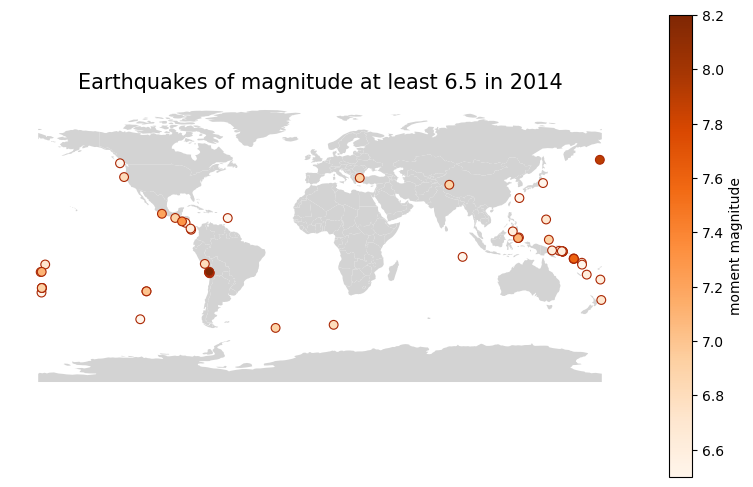

In [40]:
fig, ax = plt.subplots(figsize=(10,6))   # Update figure size, this is in inches

# Remove axis for a cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('Earthquakes of magnitude at least 6.5 in 2014', 
              fontsize=15)

# Add world
world.plot(ax=ax,
           color='lightgrey',
          edgecolor = 'none')

# Add earthquakes colored by magnitude
eqk.plot(ax=ax,
         column='mag',   # Color by values in this column
         legend=True,
         edgecolors = '#AA2704',
         markersize = 40,
         cmap = 'Oranges',
         linewidth = 0.8,
         legend_kwds={   # kwds is expecting a dictionary
                      'label': 'moment magnitude'
         
         })

plt.show()